In [1]:
from Data_manager.UserUtils import *
from Data_manager.split_functions.split_train_validation_random_holdout import \
    split_train_in_two_percentage_global_sample
URM_all = getURM_all()
URM_train_validation, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train_validation, train_percentage = 0.80)

In [2]:
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.SLIM.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender

slim_recommender = SLIMElasticNetRecommender(URM_train)
rp3beta_recommender = RP3betaRecommender(URM_train)
item_cf_recommender = ItemKNNCFRecommender(URM_train)
slim_recommender.fit(topK=8894, l1_ratio=0.05565733019999427, alpha=0.0012979360257937668)
rp3beta_recommender.fit(topK=101, alpha=0.3026342852596128, beta=0.058468783118329024)
item_cf_recommender.fit(topK=22, shrink=6431, similarity='tversky', normalize=True,
                                       feature_weighting='BM25')

SLIMElasticNetRecommender: URM Detected 447 ( 3.5%) users with no interactions.
SLIMElasticNetRecommender: URM Detected 333 ( 1.5%) items with no interactions.
RP3betaRecommender: URM Detected 447 ( 3.5%) users with no interactions.
RP3betaRecommender: URM Detected 333 ( 1.5%) items with no interactions.
ItemKNNCFRecommender: URM Detected 447 ( 3.5%) users with no interactions.
ItemKNNCFRecommender: URM Detected 333 ( 1.5%) items with no interactions.
SLIMElasticNetRecommender: Processed 18968 (85.4%) in 5.00 min. Items per second: 63.22
SLIMElasticNetRecommender: Processed 22222 (100.0%) in 6.14 min. Items per second: 60.27
RP3betaRecommender: Similarity column 22222 (100.0%), 4114.77 column/sec. Elapsed time 5.40 sec
Similarity column 22222 (100.0%), 8762.24 column/sec. Elapsed time 2.54 sec


In [3]:
user_id = 50
slim_score = slim_recommender._compute_item_score(user_id)

In [ ]:
slim_score

In [5]:
import seaborn as sns
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

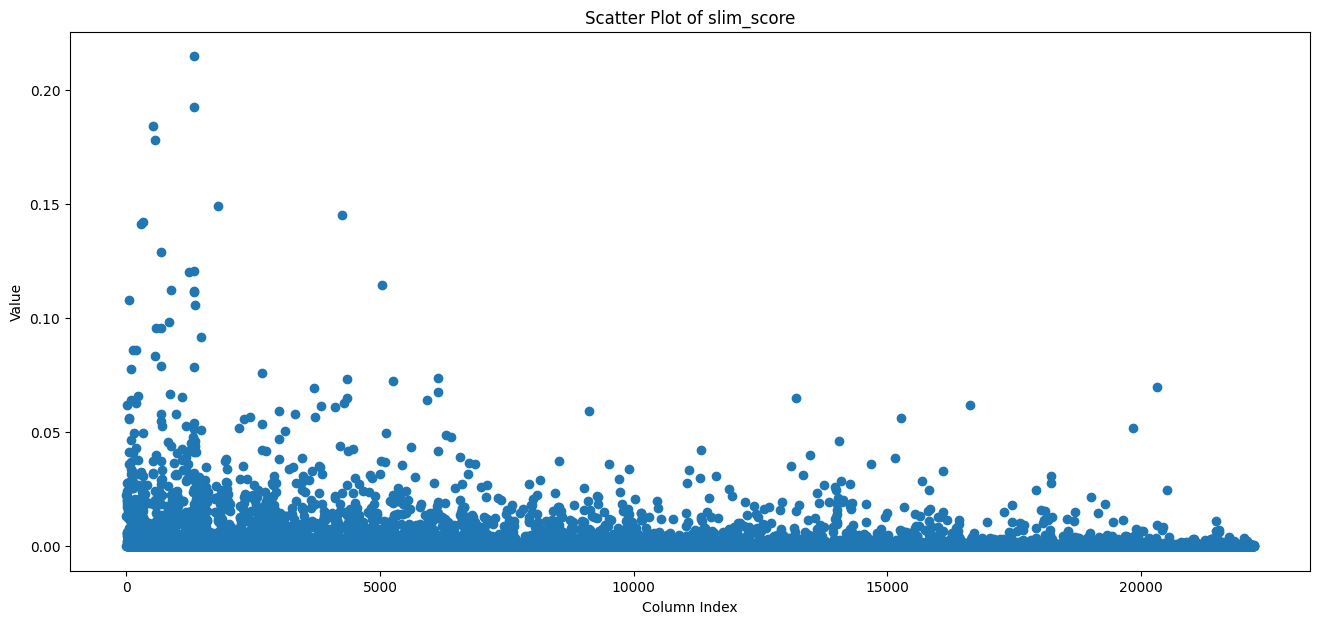

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'slim_score' is a 2D NumPy array with 1 row and N columns
plt.figure(figsize=(16, 7))

# Generate x-values: an array from 0 to N-1, where N is the number of columns
x_values = np.arange(slim_score.shape[1])

# Create a scatter plot using generated x-values and the values in your array
plt.scatter(x_values, slim_score[0, :])

# Optionally, add labels and title
plt.xlabel('Column Index')
plt.ylabel('Value')
plt.title('Scatter Plot of slim_score')

# Show the plot
plt.show()


In [ ]:
rp3beta_score = rp3beta_recommender._compute_item_score(user_id)
rp3beta_score

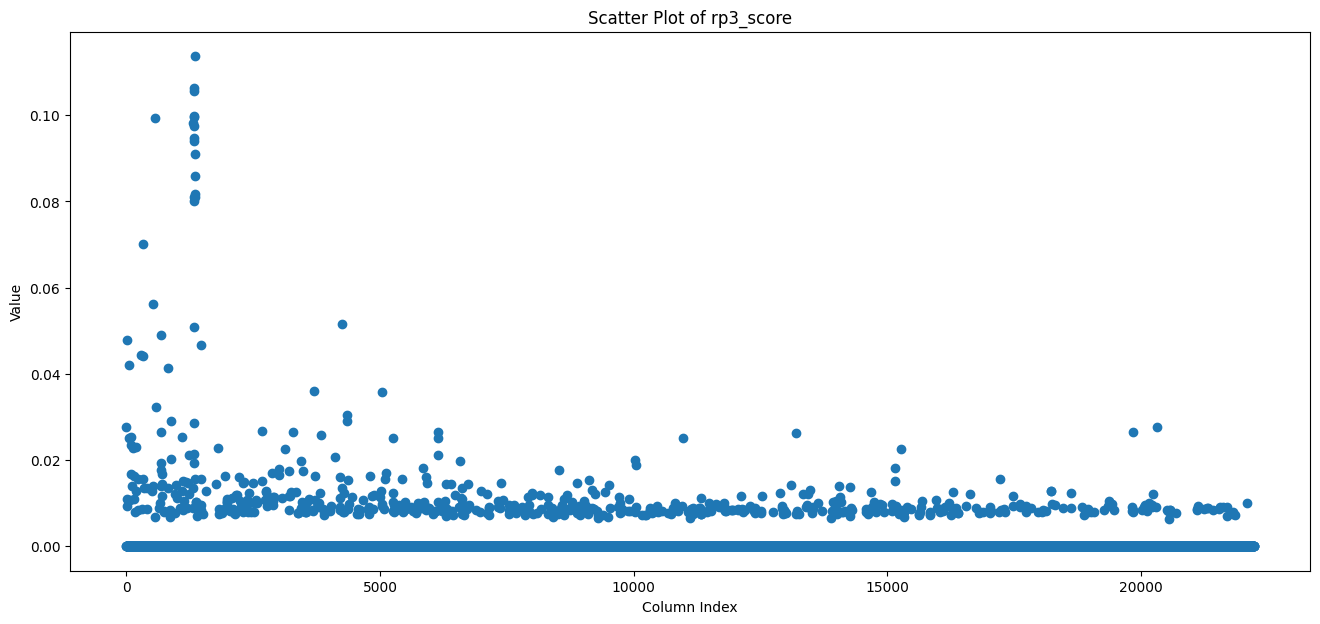

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'slim_score' is a 2D NumPy array with 1 row and N columns
plt.figure(figsize=(16, 7))

# Generate x-values: an array from 0 to N-1, where N is the number of columns
x_values = np.arange(rp3beta_score.shape[1])

# Create a scatter plot using generated x-values and the values in your array
plt.scatter(x_values, rp3beta_score[0, :])

# Optionally, add labels and title
plt.xlabel('Column Index')
plt.ylabel('Value')
plt.title('Scatter Plot of rp3_score')

# Show the plot
plt.show()


In [11]:
item_cf_score = item_cf_recommender._compute_item_score(user_id)

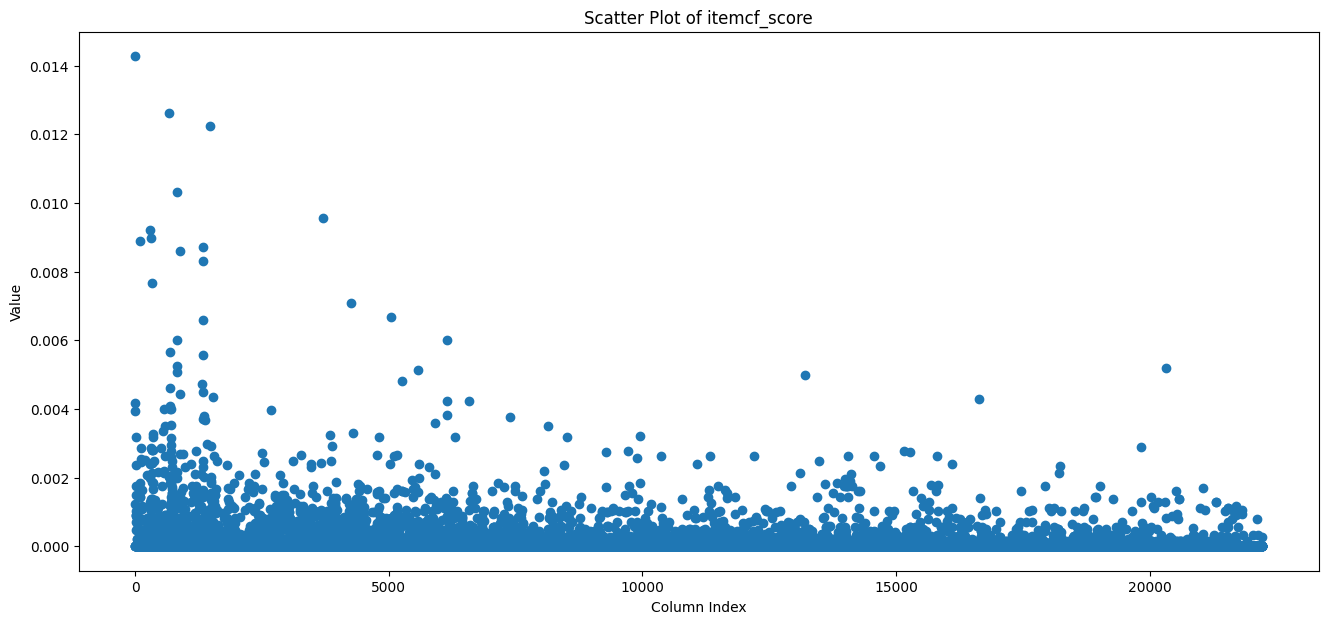

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'slim_score' is a 2D NumPy array with 1 row and N columns
plt.figure(figsize=(16, 7))

# Generate x-values: an array from 0 to N-1, where N is the number of columns
x_values = np.arange(item_cf_score.shape[1])

# Create a scatter plot using generated x-values and the values in your array
plt.scatter(x_values, item_cf_score[0, :])

# Optionally, add labels and title
plt.xlabel('Column Index')
plt.ylabel('Value')
plt.title('Scatter Plot of itemcf_score')

# Show the plot
plt.show()